In [1]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
test_df=pd.read_csv('test.csv')

In [16]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [17]:
test_df.shape

(1459, 80)

In [18]:
for i in test_df.columns:
    print(i)

Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition


In [19]:
pd.set_option('display.max_rows', None)  # Show all rows
test_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [20]:
# Calculate the percentage of missing values in each column
missing_percent = (test_df.isnull().mean() * 100).reset_index()
missing_percent.columns = ['Column', 'Missing Percentage']

# Define a threshold for coloring (e.g., 30%)
threshold = 30

# Define a function to apply the style
def color_exceeding_threshold(val):
    if val > threshold:
        return f'background-color: red'
    else:
        return f'background-color: lightgreen'

# Apply the style to the DataFrame
styled_df = missing_percent.style.applymap(color_exceeding_threshold, subset=['Missing Percentage'])

# Display the styled DataFrame
styled_df

,Column,Missing Percentage
0,Id,0.000000
1,MSSubClass,0.000000
2,MSZoning,0.274160
3,LotFrontage,15.558602
4,LotArea,0.000000
5,Street,0.000000
6,Alley,92.666210
7,LotShape,0.000000
8,LandContour,0.000000
9,Utilities,0.137080


In [21]:
test_df.columns[test_df.isna().any()].tolist()

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [22]:
columns_to_drop = ['Alley','PoolQC','Fence','MiscFeature','FireplaceQu']
test_df.drop(columns=columns_to_drop,axis=1, inplace=True)

In [23]:
test_df.shape

(1459, 75)

In [26]:
# Calculate the percentage of missing values in each column
#missing_percent = (test_df.isnull().mean() * 100).reset_index()
missing_percent = (test_df.isnull().sum()).reset_index()

missing_percent.columns = ['Column', 'Missing Percentage']

# Define a threshold for coloring (e.g., 30%)
threshold = 0

# Define a function to apply the style
def color_exceeding_threshold(val):
    if val > threshold:
        return f'background-color: red'
    else:
        return f'background-color: lightgreen'

# Apply the style to the DataFrame
styled_df = missing_percent.style.applymap(color_exceeding_threshold, subset=['Missing Percentage'])

# Display the styled DataFrame
styled_df

,Column,Missing Percentage
0,Id,0
1,MSSubClass,0
2,MSZoning,4
3,LotFrontage,227
4,LotArea,0
5,Street,0
6,LotShape,0
7,LandContour,0
8,Utilities,2
9,LotConfig,0


In [29]:
test_df['LotFrontage']=test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean())

In [31]:
columns_to_fill = ['MSZoning','Utilities','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','BsmtExposure','BsmtCond', 'BsmtQual', 'GarageType','GarageYrBlt','GarageFinish', 'GarageQual','GarageArea','GarageCars','GarageCond','BsmtFinType1','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','KitchenQual','Functional','SaleType']

# Fill the specified columns with their respective modes
for column in columns_to_fill:
    test_df[column].fillna(test_df[column].mode()[0], inplace=True)


In [34]:
# Calculate the percentage of missing values in each column
#missing_percent = (test_df.isnull().mean() * 100).reset_index()
missing_percent = (test_df.isnull().sum()).reset_index()

missing_percent.columns = ['Column', 'Missing Percentage']

# Define a threshold for coloring (e.g., 30%)
threshold = 0

# Define a function to apply the style
def color_exceeding_threshold(val):
    if val > threshold:
        return f'background-color: red'
    else:
        return f'background-color: lightgreen'

# Apply the style to the DataFrame
styled_df = missing_percent.style.applymap(color_exceeding_threshold, subset=['Missing Percentage'])

# Display the styled DataFrame
styled_df

,Column,Missing Percentage
0,Id,0
1,MSSubClass,0
2,MSZoning,0
3,LotFrontage,0
4,LotArea,0
5,Street,0
6,LotShape,0
7,LandContour,0
8,Utilities,0
9,LotConfig,0


In [35]:
columns_to_fill = ['BsmtFinType2','BsmtFinSF2']

# Fill the specified columns with their respective modes
for column in columns_to_fill:
    test_df[column].fillna(test_df[column].mode()[0], inplace=True)


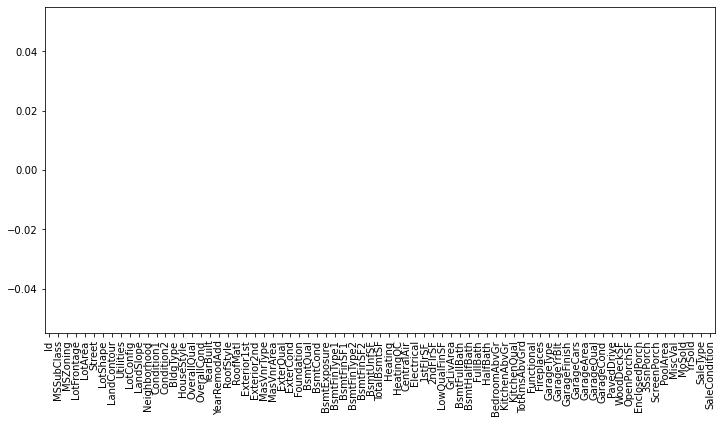

In [36]:
missing_counts = test_df.isnull().sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_counts.index, y=missing_counts.values)
plt.xticks(rotation=90)
plt.show()

In [38]:
test_df.shape

(1459, 75)

<AxesSubplot:>

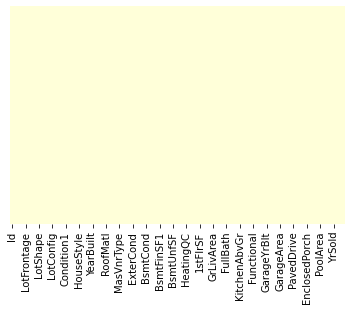

In [49]:
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [50]:
test_df['BsmtCond'].value_counts()

TA    1340
Fa      59
Gd      57
Po       3
Name: BsmtCond, dtype: int64